In [2]:
%matplotlib ipympl
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å

In [36]:
#=========================================================================================================#
# First, we define the Hamiltonian of a single particle confined in an harmonic oscillator potential. 
#=========================================================================================================#

#interaction potential
def harmonic_oscillator(particle):
    m = m_e
    T = 0.6*femtoseconds #0.6
    w = 2*np.pi/T
    k = m* w**2
    return 0.5 * k * particle.x**2 


#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 500, extent = 30 * Å)

In [37]:
#=========================================================================================================#
# Define the wavefunction at t = 0  (initial condition)
#=========================================================================================================#

def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean X momentum equal to p_x0
    σ = 0.7 * Å
    v0 = 60 * Å / femtoseconds #60
    p_x0 = m_e * v0
    return np.exp( -1/(4* σ**2) * ((particle.x-0)**2) / np.sqrt(2*np.pi* σ**2))  *np.exp(p_x0*particle.x*1j)

Took 0.8249990940093994


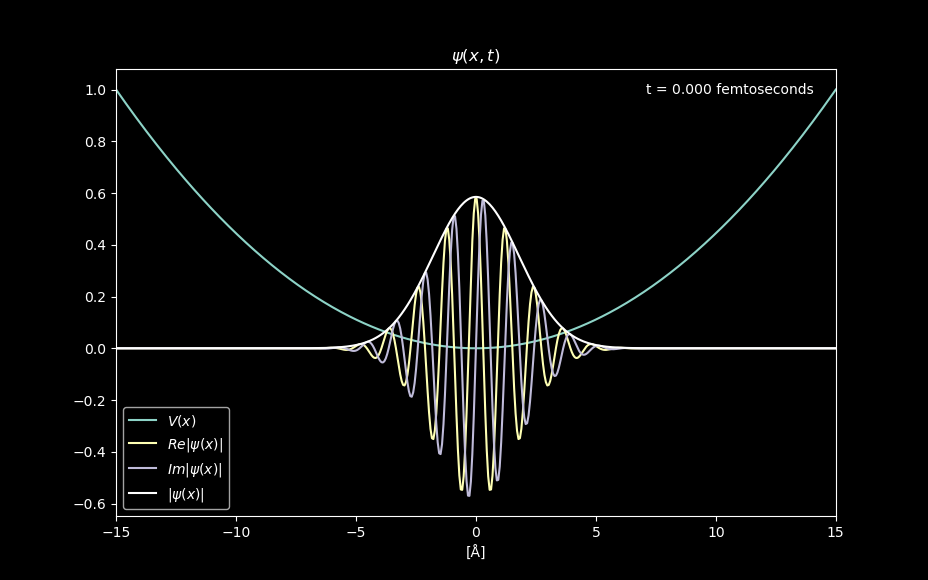

In [41]:
#=========================================================================================================#
# Set and run the simulation
#=========================================================================================================#

total_time = 1.8 * femtoseconds
#set the time dependent simulation
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/1600., store_steps = 800)

#=========================================================================================================#
# Finally, we visualize the time dependent simulation
#=========================================================================================================#

visualization = init_visualization(sim)
visualization.animate(xlim=[-15* Å,15* Å], animation_duration = 10, save_animation = False, fps = 30)